In [22]:
import pandas as pd 

In [23]:
df =pd.read_csv('heart_disease_data.csv')

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
col = df.columns

In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
X = df.drop('target',axis=1)
y= df['target']

In [28]:
y.value_counts() # almost equal no process idf 80% lies in ne class and 20% in other .we need to do some processing
#1 Defective heart 0 -Healthy

target
1    165
0    138
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # default gini index
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [30]:
from sklearn.metrics import accuracy_score

y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 73.63%


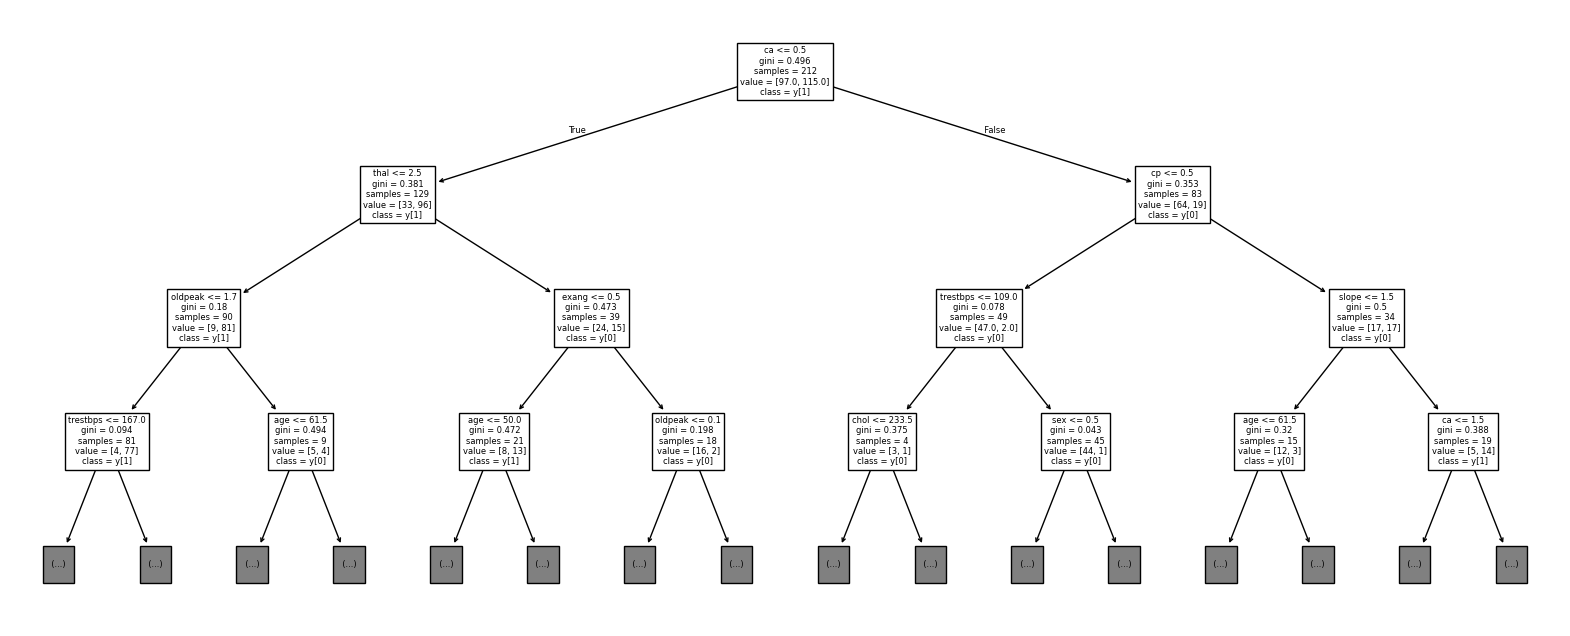

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the trained decision tree
plt.figure(figsize=(20, 8))
plot_tree(dt_classifier,max_depth=3,class_names=True,feature_names=col)
plt.show()
